In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
from datetime import datetime
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from eigsep_data import ImuCalibrator, ImuSnapshot, ImuDataset, S11

In [3]:
data_dir = Path("/home/christian/Documents/research/eigsep/data-analysis/data/deployment4/s11_data/")
files = [f for f in data_dir.iterdir() if f.name.startswith("ant")]

In [4]:
def lin2dB(arr):
    return 20*np.log10(np.abs(arr)) 

In [5]:
s11 = [S11(f) for f in files]
time_ix = np.argsort([s.timestamp for s in s11])
s11 = np.array(s11)[time_ix]

## Lift - Saturday July 19

Lift are the first 13 files, taken at 5 minute cadence. First two measurements were made while still on the ground.

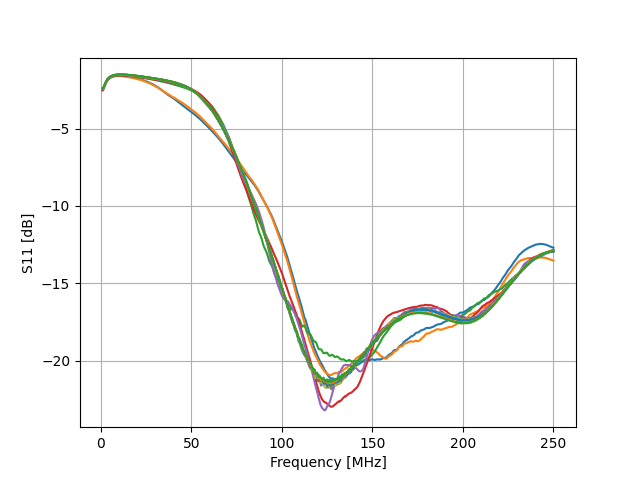

In [6]:
lift_s11 = s11[:13]

plt.figure()
for s in lift_s11:
    plt.plot(s.freqs, lin2dB(s.s11_cal["ant"]))
plt.xlabel("Frequency [MHz]")
plt.ylabel("S11 [dB]")
# plt.legend()
plt.grid()
plt.show()

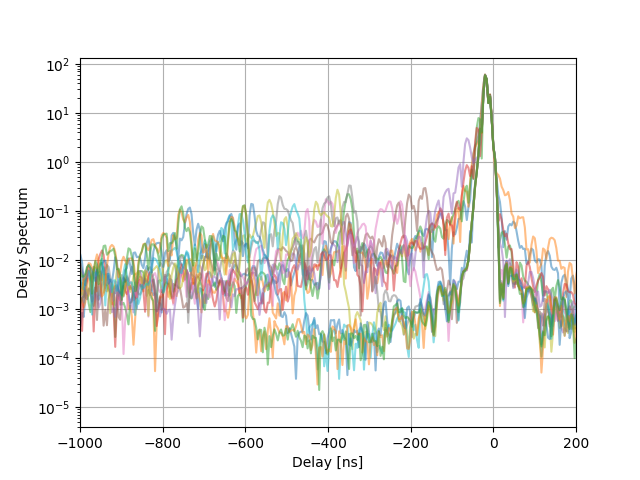

In [7]:
# delay

plt.figure()
for s in lift_s11:
    plt.plot(np.fft.fftshift(s.dlys), np.fft.fftshift(s.s11_dly["ant"]), alpha=0.5)
plt.yscale("log")
plt.xlabel("Delay [ns]")
plt.ylabel("Delay Spectrum")
plt.xlim(-1000, 200)
# plt.legend()
plt.grid()
plt.show()

## Rotations, July 20

At full height, did 8 measurements from 1-500 MHz. Elevation 0, 90, 180, 270 deg (0 being up), and azimuth 0 deg (aligned with kevlar) and 90 deg.

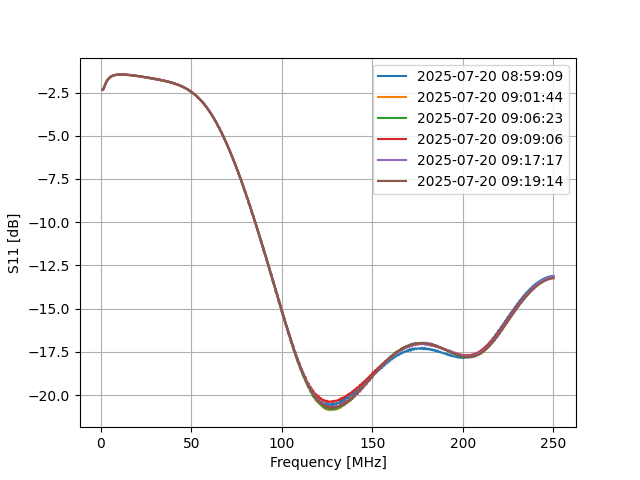

In [14]:
rot_s11 = s11[33:41]

cal = ImuCalibrator.from_imu_data(rot_s11[0].meta["imu_panda"])
imu = ImuDataset(calibrator=cal)

plt.figure()
for s in rot_s11:
    snap = ImuSnapshot.from_imu_data(s.meta["imu_panda"])
    imu.add_snapshot(snap)
    angle = snap.get_tilt_from_gravity()
    if np.min(lin2dB(s.s11_cal["ant"])) < -40:
        #print(angle, s.time)
        continue
    plt.plot(s.freqs, lin2dB(s.s11_cal["ant"]), label=s.time)
plt.xlabel("Frequency [MHz]")
plt.ylabel("S11 [dB]")
plt.legend()
plt.grid()
plt.show()